In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv', sep=',', names=['sex', 'length', 'diameter', 'height', 'whole weight', 
                           'shucked weight', 'viscera weight', 'shell weight', 'rings'])

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
sexCount = df.groupby('sex').agg(count=('sex', 'count'))
sexPercentage = sexCount.apply(lambda x: round(100 * x / float(x.sum()),2)).rename(columns={'count': '%'})

result1 = sexCount.merge(sexPercentage, on='sex', how='left').sort_index(ascending=False).rename(index={'M':'Male','I':'Infant','F':'Female'})
result1

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [7]:
result2 = df.describe().drop('count').T
result2.index = result2.index.str.capitalize()
result2

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


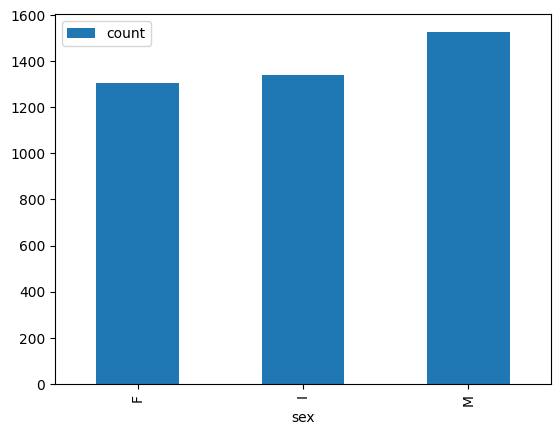

In [8]:
sexCount.plot.bar();

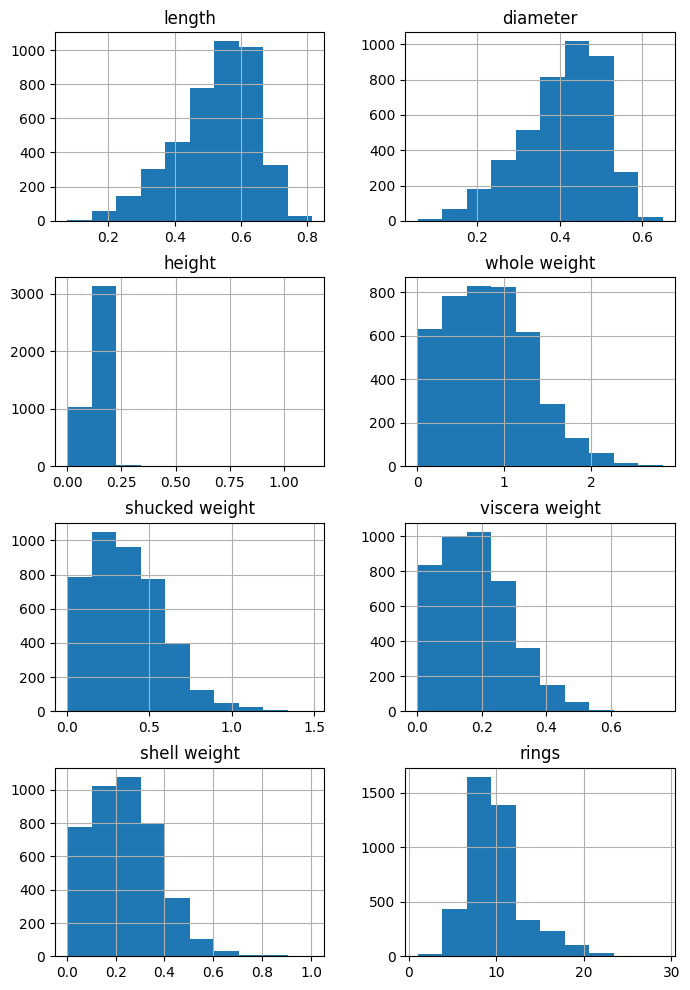

In [198]:
quantitative_vars = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
df[quantitative_vars].hist(figsize=(8,12), layout=(4,2));

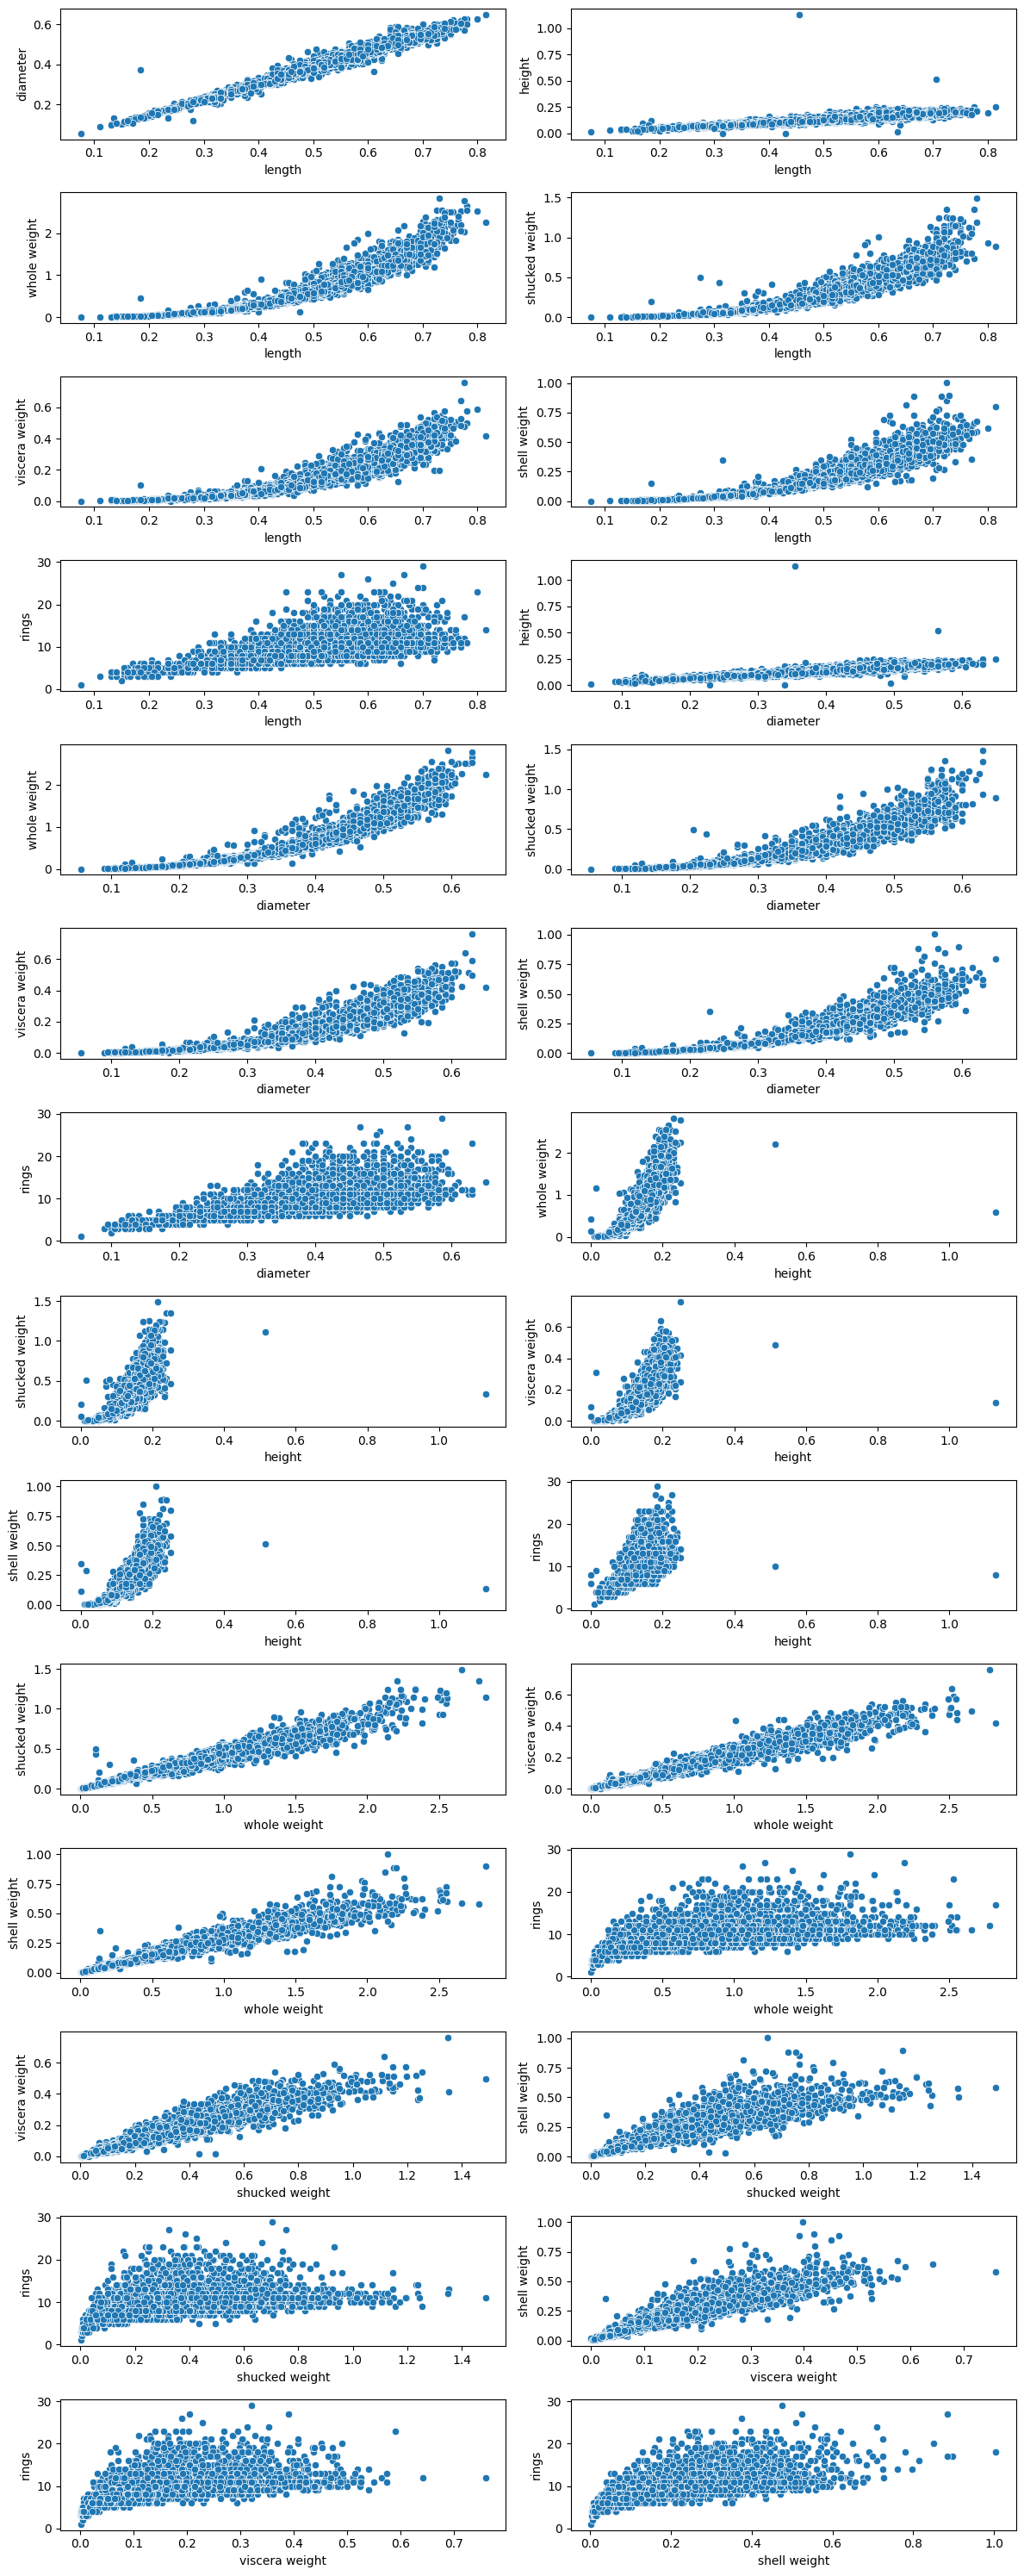

In [10]:
fig, axes = plt.subplots(14, 2, figsize=(12, 30))

k = 0
for i in range(len(quantitative_vars)):
    for j in range(i+1, len(quantitative_vars)):
        x = quantitative_vars[i]
        y = quantitative_vars[j]
        ax = axes[k // 2, k % 2]  # Set the current axis
        k += 1
        sns.scatterplot(data=data, x=x, y=y, ax=ax)
        ax.set_xlabel(x)
        ax.set_ylabel(y)

plt.tight_layout()
plt.show()

In [11]:
linear_correlation_matrix = df.select_dtypes(include=['number']).corr()
linear_correlation_matrix

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

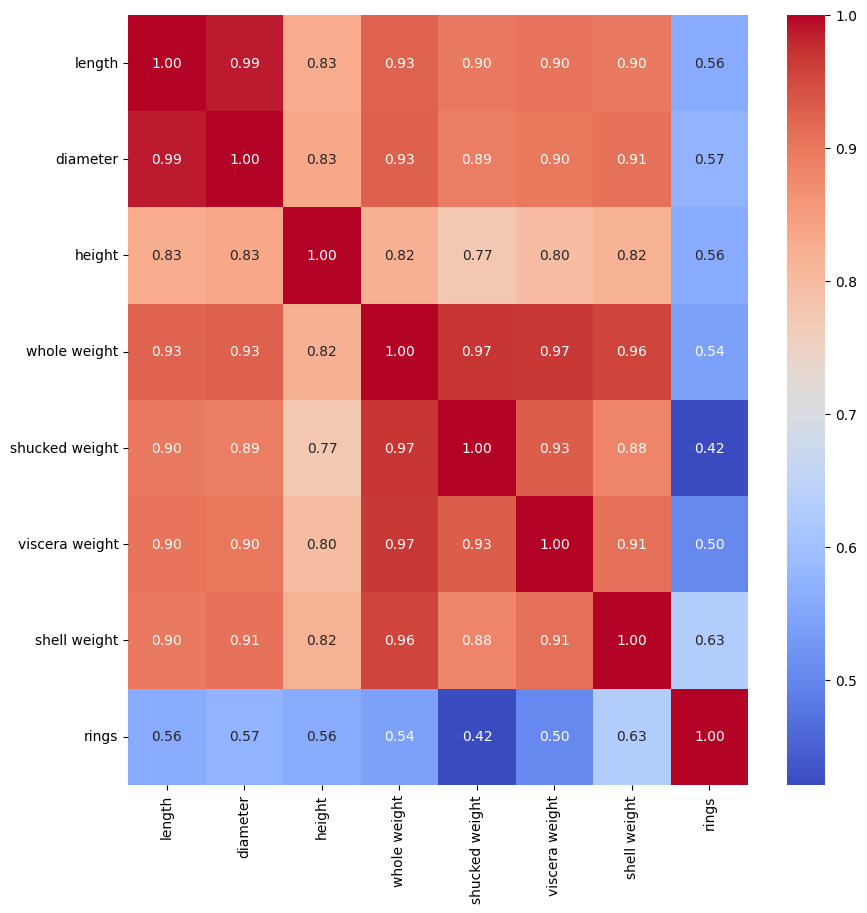

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(linear_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='diameter', ylabel='length'>

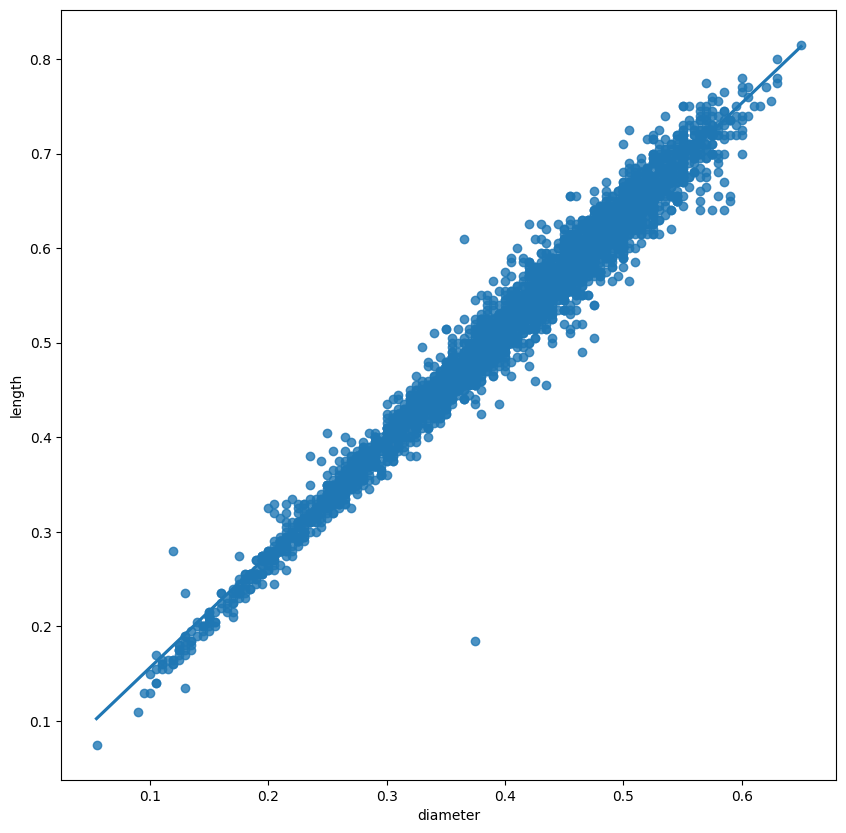

In [193]:
strongest_correlations = linear_correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlations = strongest_correlations[strongest_correlations != 1].index[0] # exclude self-correlation
var1, var2 = strongest_correlations
plt.figure(figsize=(10, 10))
sns.regplot(x=var1, y=var2, data=df)

In [214]:
result2 = df.groupby(['sex']).describe().T
result2

sex                     F            I            M
length count  1307.000000  1342.000000  1528.000000
       mean      0.579093     0.427746     0.561391
       std       0.086160     0.108858     0.102697
       min       0.275000     0.075000     0.155000
       25%       0.525000     0.360000     0.505000
...                   ...          ...          ...
rings  min       5.000000     1.000000     3.000000
       25%       9.000000     6.000000     9.000000
       50%      10.000000     8.000000    10.000000
       75%      12.000000     9.000000    12.000000
       max      29.000000    21.000000    27.000000

[64 rows x 3 columns]